In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load data
data = pd.read_parquet("Data/DSB_BDK_trainingset.parquet").reset_index()

In [6]:
# Interesting features
features_high = []
features_low = []

0          3.0
1          3.0
2          0.0
3         12.0
4         12.0
          ... 
199441     0.0
199442     0.0
199443     0.0
199444     0.0
199445     0.0
Name: dsb_opformeringer, Length: 199446, dtype: float64

In [47]:
def plotting_trends(col_name, check_seasonality='cos'):
    data_col = data.groupby('dato').mean().reset_index()[col_name]
    date = data['dato'].drop_duplicates()
    plt.plot(date, data_col, label=col_name)
    if check_seasonality:
            sin = data.groupby('dato').mean().reset_index()[check_seasonality]
            plt.plot(date, sin+np.mean(data_col), label=check_seasonality)
    plt.title(col_name)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

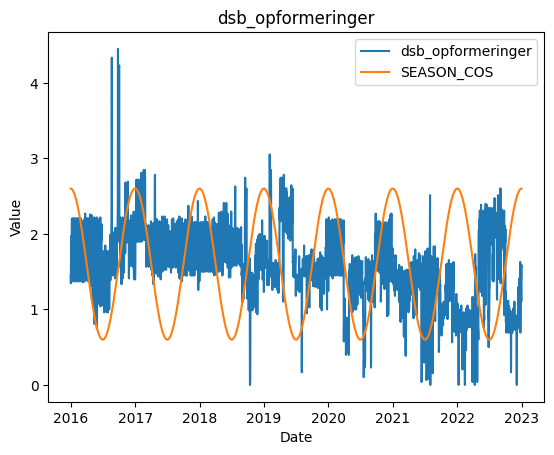

In [48]:
plotting_trends('dsb_opformeringer', check_seasonality='SEASON_COS')

In [ ]:
# Correlation map
